# Introduction

Multi-dimensional scaling (MDS) is a technique used to visualize high-dimensional data in a lower dimensional space (usually 2D or 3D) while preserving the pairwise distances between the data points as much as possible. It is often used in exploratory data analysis and visualization.

In this tutorial, we will walk through the steps of performing MDS on a generated noisy dataset using the scikit-learn library in Python.

# Import Libraries

First, we need to import the necessary libraries. We will be using numpy, matplotlib, scikit-learn, and PCA from scikit-learn.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

# Generate Data

Next, we will generate a noisy dataset using numpy. We will generate 20 samples with 2 features each.

In [2]:
EPSILON = np.finfo(np.float32).eps
n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(float)
X_true = X_true.reshape((n_samples, 2))
# Center the data
X_true -= X_true.mean()

# Add Noise to Data

We will then add noise to the pairwise distances between the data points using numpy.

In [3]:
similarities = euclidean_distances(X_true)

# Add noise to the similarities
noise = np.random.rand(n_samples, n_samples)
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise

# Perform MDS

We will then perform MDS on the noisy dataset using scikit-learn's MDS class. We will use the precomputed dissimilarity option since we have already calculated the pairwise distances between the data points. We will also set the number of components to 2 for 2D visualization.

In [4]:
mds = manifold.MDS(
    n_components=2,
    max_iter=3000,
    eps=1e-9,
    random_state=seed,
    dissimilarity="precomputed",
    n_jobs=1,
    normalized_stress="auto",
)
pos = mds.fit(similarities).embedding_

# Perform Non-Metric MDS

We will also perform non-metric MDS on the same dataset for comparison. We will use the same options as MDS, except we will set the metric option to False.

In [5]:
nmds = manifold.MDS(
    n_components=2,
    metric=False,
    max_iter=3000,
    eps=1e-12,
    dissimilarity="precomputed",
    random_state=seed,
    n_jobs=1,
    n_init=1,
    normalized_stress="auto",
)
npos = nmds.fit_transform(similarities, init=pos)

# Rescale and Rotate Data

We will then rescale and rotate the data for visualization using PCA from scikit-learn.

In [6]:
# Rescale the data
pos *= np.sqrt((X_true**2).sum()) / np.sqrt((pos**2).sum())
npos *= np.sqrt((X_true**2).sum()) / np.sqrt((npos**2).sum())

# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)
pos = clf.fit_transform(pos)
npos = clf.fit_transform(npos)

# Visualize Results

Finally, we will visualize the results using matplotlib. We will plot the true position of the data points, the position of the data points using MDS, and the position of the data points using non-metric MDS. We will also plot the pairwise distances between the data points using LineCollection from matplotlib.

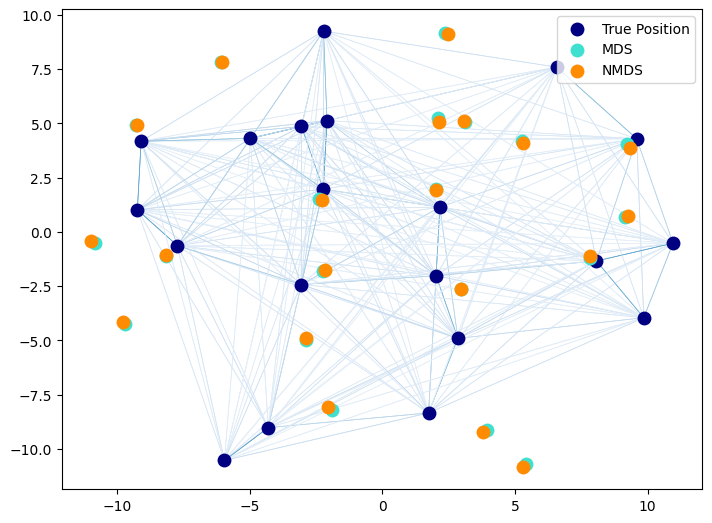

In [7]:
fig = plt.figure(1)
ax = plt.axes([0.0, 0.0, 1.0, 1.0])

s = 100
plt.scatter(X_true[:, 0], X_true[:, 1], color="navy", s=s, lw=0, label="True Position")
plt.scatter(pos[:, 0], pos[:, 1], color="turquoise", s=s, lw=0, label="MDS")
plt.scatter(npos[:, 0], npos[:, 1], color="darkorange", s=s, lw=0, label="NMDS")
plt.legend(scatterpoints=1, loc="best", shadow=False)

similarities = similarities.max() / (similarities + EPSILON) * 100
np.fill_diagonal(similarities, 0)
# Plot the edges
start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [
    [X_true[i, :], X_true[j, :]] for i in range(len(pos)) for j in range(len(pos))
]
values = np.abs(similarities)
lc = LineCollection(
    segments, zorder=0, cmap=plt.cm.Blues, norm=plt.Normalize(0, values.max())
)
lc.set_array(similarities.flatten())
lc.set_linewidths(np.full(len(segments), 0.5))
ax.add_collection(lc)

plt.show()

# Summary

In this tutorial, we learned how to perform MDS on a noisy dataset using scikit-learn in Python. We also learned how to visualize the results using matplotlib. MDS is a useful technique for visualizing high-dimensional data in a lower dimensional space while preserving the pairwise distances between the data points as much as possible.